In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df = pd.read_csv("Placement_Data_Full_Class.csv")

In [4]:
df.shape

(215, 15)

In [5]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [7]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [8]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]
pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
sl_no,215
gender,2
ssc_p,103
ssc_b,2
hsc_p,97
hsc_b,2
hsc_s,3
degree_p,89
degree_t,3
workex,2


In [9]:
categorical_columns = ['gender','ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
numerical_columns = ["ssc_p","hsc_p","degree_p","etest_p","mba_p","salary"]
target_columns = ["status"]
print("The categorial cols are : ", categorical_columns)
print("The numerical cols are : ", numerical_columns)
print("The target variable is :  ", target_columns)

The categorial cols are :  ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
The numerical cols are :  ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
The target variable is :   ['status']


In [10]:
df[numerical_columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


In [11]:
df[categorical_columns].describe().transpose()

,count,unique,top,freq
gender,215,2,M,139
ssc_b,215,2,Central,116
hsc_b,215,2,Others,131
hsc_s,215,3,Commerce,113
degree_t,215,3,Comm&Mgmt,145
workex,215,2,No,141
specialisation,215,2,Mkt&Fin,120
status,215,2,Placed,148


In [12]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [13]:
df['salary'] = df['salary'].fillna(0)

In [14]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [15]:
df['SSC_Grade'] = pd.cut(x=df['ssc_p'], bins=[40,50,60,70,80,90,100],
                     labels=['P','D','C', 'B', 'A','O'])
df['HSC_Grade'] = pd.cut(x=df['hsc_p'], bins=[40,50,60,70,80,90,100],
                     labels=['P','D','C', 'B', 'A','O'])
df['Degree_Grade'] = pd.cut(x=df['degree_p'], bins=[40,50,60,70,80,90,100],
                     labels=['P','D','C', 'B', 'A','O'])      
df['ETEST_Grade'] = pd.cut(x=df['etest_p'], bins=[40,50,60,70,80,90,100],
                     labels=['P','D','C', 'B', 'A','O'])
df['MBA_Grade'] = pd.cut(x=df['mba_p'], bins=[40,50,60,70,80,90,100],
                     labels=['P','D','C', 'B', 'A','O'])     

In [16]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,SSC_Grade,HSC_Grade,Degree_Grade,ETEST_Grade,MBA_Grade
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,C,O,D,D,D
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,B,B,B,A,C
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,C,C,C,B,D
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0,D,D,D,C,D
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,A,B,B,O,D


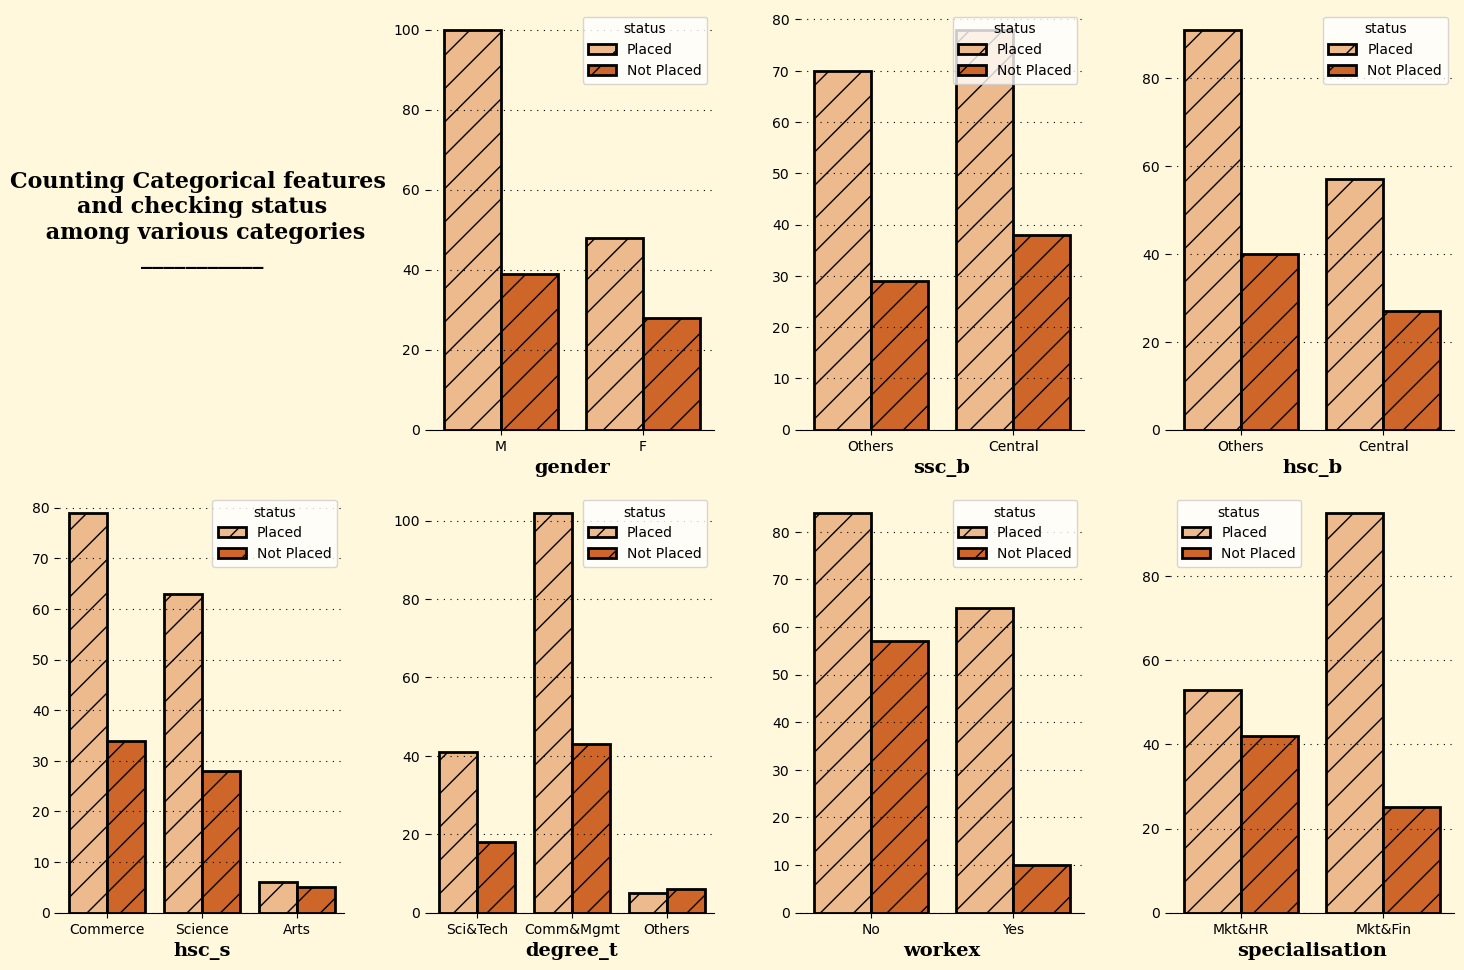

In [17]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(3,4)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[0,3])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[1,3])

background_color = "#FFF8DD"

fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 

ax0.text(0.5,0.5,"Counting Categorical features \nand checking status\n among various categories\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 16,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x='gender',palette = 'Oranges', hue='status',edgecolor='black',**{'hatch':'/','linewidth':2})
ax1.set_xlabel("gender",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2, data=df, x='ssc_b',palette = 'Oranges', hue='status',edgecolor='black',**{'hatch':'/','linewidth':2})
ax2.set_xlabel("ssc_b",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3, data=df, x='hsc_b',palette = 'Oranges',hue='status',edgecolor='black',**{'hatch':'/','linewidth':2})
ax3.set_xlabel("hsc_b",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4, data=df, x='hsc_s',palette = 'Oranges',hue='status',edgecolor='black',**{'hatch':'/','linewidth':2})
ax4.set_xlabel("hsc_s",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5, data=df, x='degree_t',palette = 'Oranges',hue='status',edgecolor='black',**{'hatch':'/','linewidth':2})
ax5.set_xlabel("degree_t",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6, data=df, x='workex',palette = 'Oranges',hue='status',edgecolor='black',**{'hatch':'/','linewidth':2})
ax6.set_xlabel("workex",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7, data=df, x='specialisation',palette = 'Oranges',hue='status',edgecolor='black',**{'hatch':'/','linewidth':2})
ax7.set_xlabel("specialisation",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)

ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)

ax3.spines["top"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.spines["right"].set_visible(False)

ax4.spines["top"].set_visible(False)
ax4.spines["left"].set_visible(False)
ax4.spines["right"].set_visible(False)

ax5.spines["top"].set_visible(False)
ax5.spines["left"].set_visible(False)
ax5.spines["right"].set_visible(False)

ax6.spines["top"].set_visible(False)
ax6.spines["left"].set_visible(False)
ax6.spines["right"].set_visible(False)

ax7.spines["top"].set_visible(False)
ax7.spines["left"].set_visible(False)
ax7.spines["right"].set_visible(False)

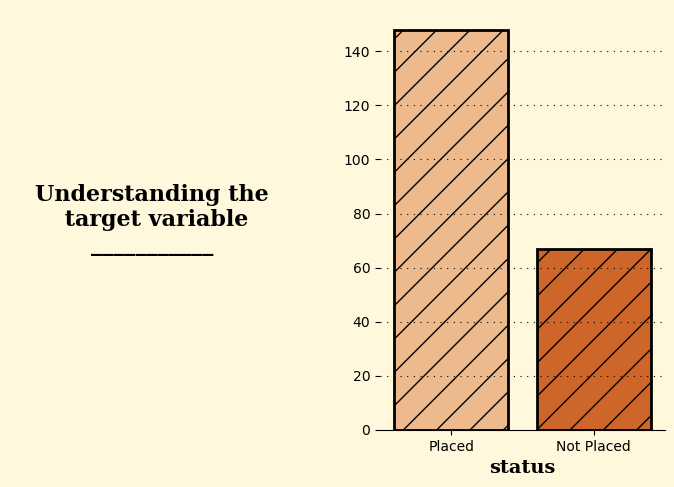

In [18]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(3,4)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#FFF8DC"

fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

ax0.text(0.5,0.5,"Understanding the\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 16,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x='status',palette = 'Oranges', edgecolor='black',**{'hatch':'/','linewidth':2})
ax1.set_xlabel("status",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)

ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

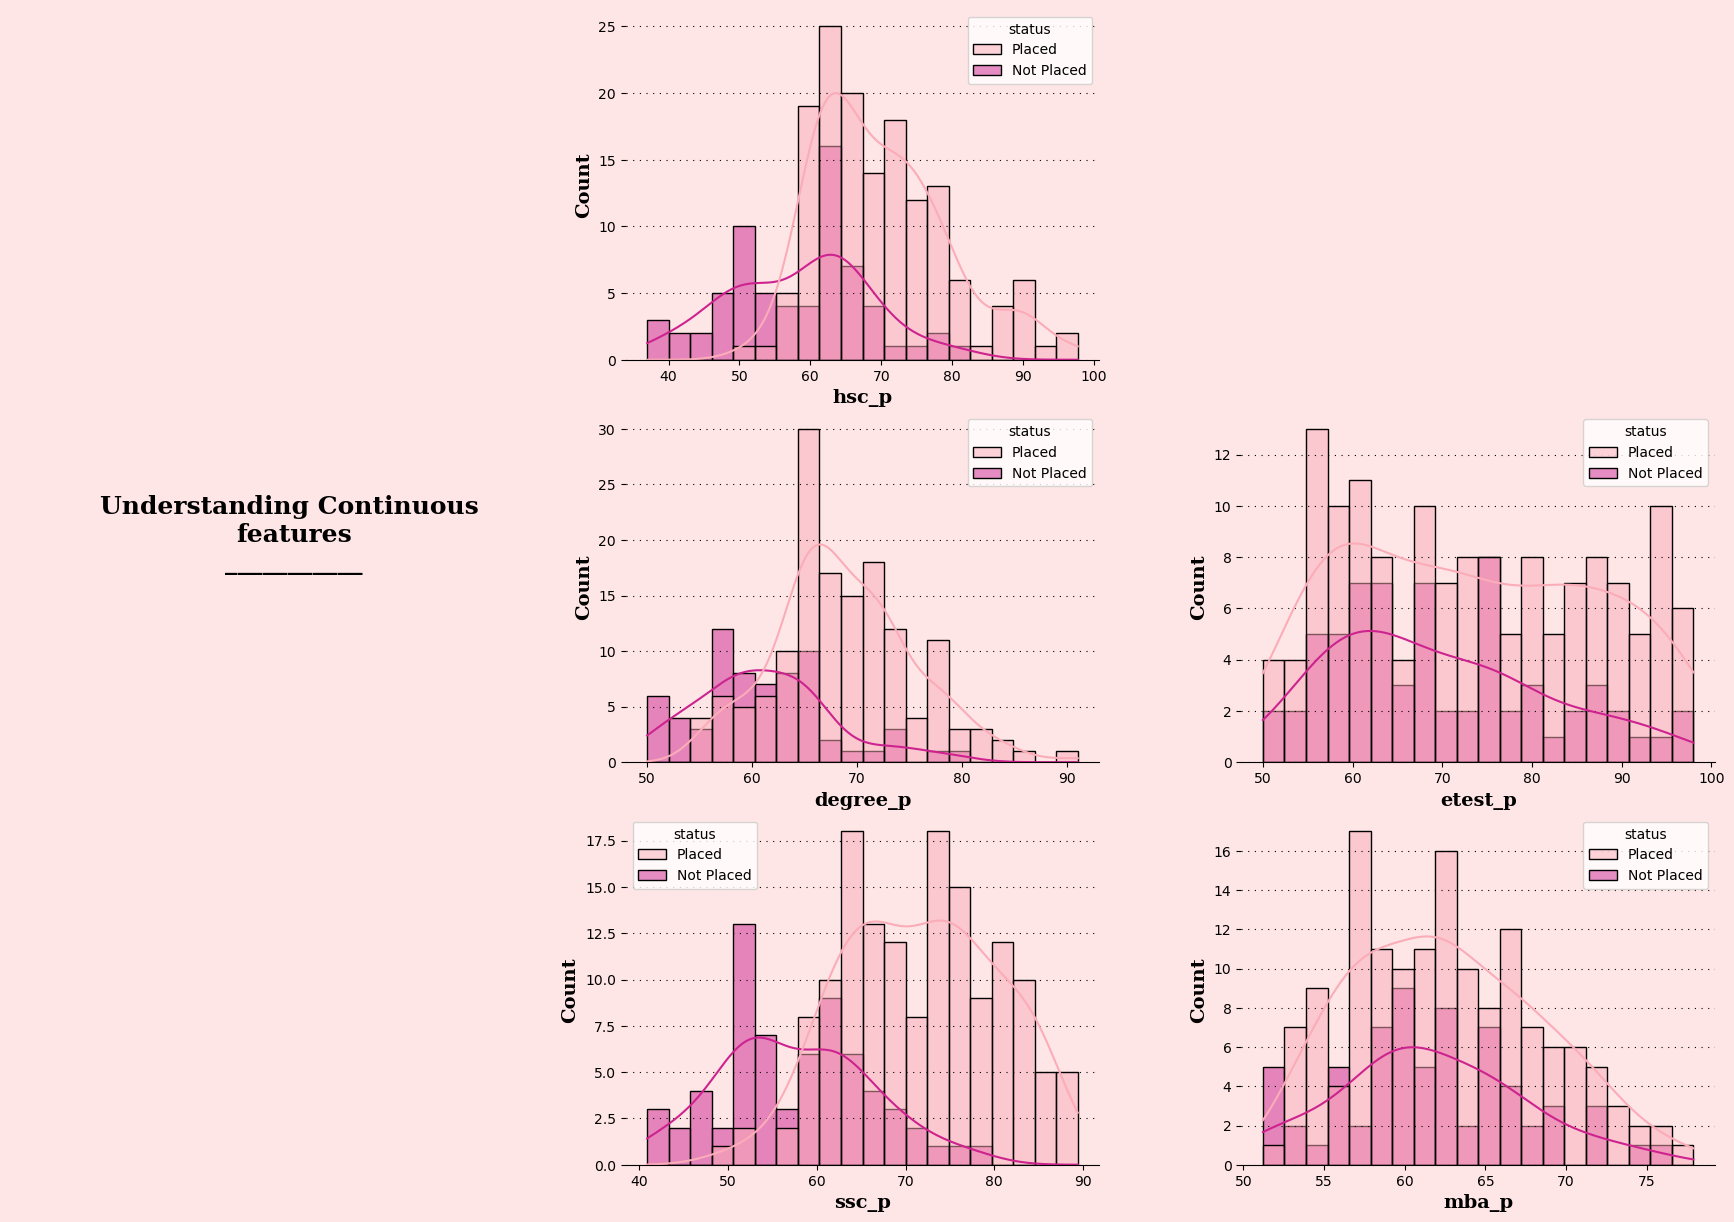

In [19]:
fig = plt.figure(figsize=(22,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,1])
ax3 = fig.add_subplot(gs[1,2])
ax4 = fig.add_subplot(gs[2,2])
ax5 = fig.add_subplot(gs[2,1])
background_color = "#ffe6e6"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.6,-0.5,"Understanding Continuous \nfeatures\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax1, data=df, x = 'hsc_p', hue="status",palette = 'RdPu', bins=20, kde=True, edgecolor='black')
ax1.set_xlabel("hsc_p",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.set_ylabel("Count",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax2, data=df, x = 'degree_p', hue="status",palette = 'RdPu', bins=20, kde=True, edgecolor='black')
ax2.set_xlabel("degree_p",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.set_ylabel("Count",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax3, data=df, x = 'etest_p', hue="status",palette = 'RdPu', bins=20, kde=True, edgecolor='black')
ax3.set_xlabel("etest_p",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.set_ylabel("Count",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax4, data=df, x = 'mba_p', hue="status",palette = 'RdPu', bins=20, kde=True, edgecolor='black')
ax4.set_xlabel("mba_p",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.set_ylabel("Count",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax5, data=df, x = 'ssc_p', hue="status",palette = 'RdPu', bins=20, kde=True, edgecolor='black')
ax5.set_xlabel("ssc_p",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.set_ylabel("Count",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)

ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)

ax3.spines["top"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.spines["right"].set_visible(False)

ax4.spines["top"].set_visible(False)
ax4.spines["left"].set_visible(False)
ax4.spines["right"].set_visible(False)

ax5.spines["top"].set_visible(False)
ax5.spines["left"].set_visible(False)
ax5.spines["right"].set_visible(False)

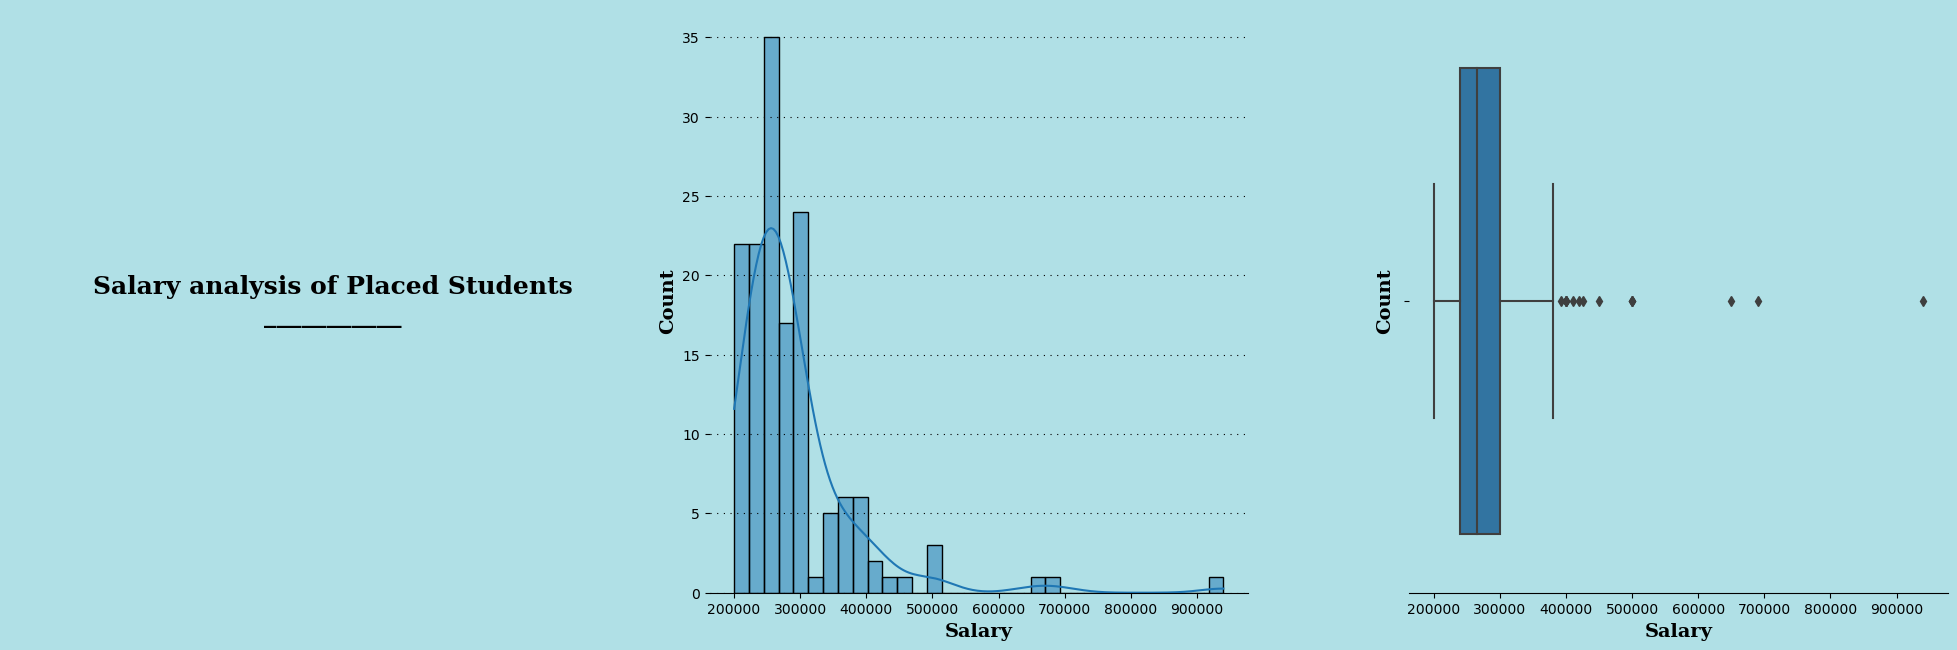

In [20]:
fig = plt.figure(figsize=(25,25))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2= fig.add_subplot(gs[0,2])

background_color = "#B0E0E6"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 

ax0.text(0.6,0.5,"Salary analysis of Placed Students\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax1,data=df[df['salary']>0], x='salary', kde=True, edgecolor='black')
ax1.set_xlabel("Salary",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.set_ylabel("Count",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax2,data=df[df['salary']>0], x='salary')
ax2.set_xlabel("Salary",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.set_ylabel("Count",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)

ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)

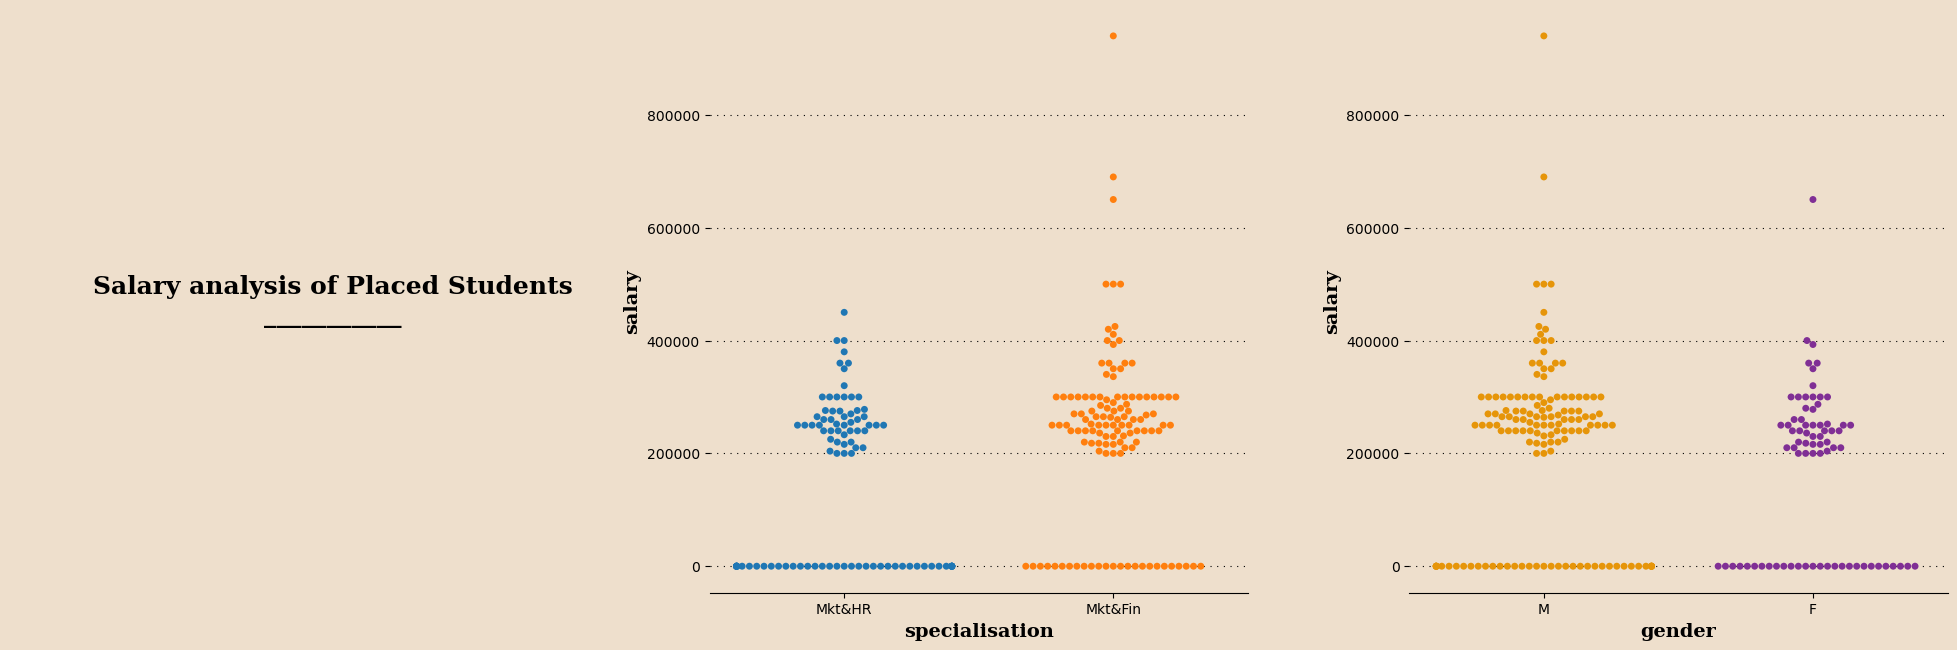

In [21]:
import warnings
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(25,25))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])


background_color = "#EEDFCC"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 

ax0.text(0.6,0.5,"Salary analysis of Placed Students\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.swarmplot(ax=ax1,y = df['salary'], x = df['specialisation'])
ax1.set_xlabel("specialisation",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.set_ylabel("salary",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.swarmplot(y = df['salary'], x = df['gender'],palette='CMRmap_r')
ax2.set_xlabel("gender",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.set_ylabel("salary",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)

ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)

In [22]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,SSC_Grade,HSC_Grade,Degree_Grade,ETEST_Grade,MBA_Grade
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,C,O,D,D,D
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,B,B,B,A,C
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,C,C,C,B,D
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0,D,D,D,C,D
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,A,B,B,O,D


In [23]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
object_cols=['gender','workex','specialisation','status','hsc_b','ssc_b']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,SSC_Grade,HSC_Grade,Degree_Grade,ETEST_Grade,MBA_Grade
0,1,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0,C,O,D,D,D
1,2,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0,B,B,B,A,C
2,3,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0,C,C,C,B,D
3,4,1,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0,D,D,D,C,D
4,5,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0,A,B,B,O,D


In [43]:
dummy_hsc_s=pd.get_dummies(df['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(df['degree_t'], prefix='dummy')
dummy_SSC_Grade=pd.get_dummies(df['SSC_Grade'], prefix='dummyssc')
dummy_HSC_Grade=pd.get_dummies(df['HSC_Grade'], prefix='dummyhsc')
dummy_Degree_Grade=pd.get_dummies(df['Degree_Grade'], prefix='dummydegree')
dummy_ETEST_Grade=pd.get_dummies(df['ETEST_Grade'], prefix='dummyetest')
dummy_MBA_Grade=pd.get_dummies(df['MBA_Grade'], prefix='dummymba')

placement_coded = pd.concat([df,dummy_hsc_s],axis=1)
#dummy_degree_t,dummy_SSC_Grade,dummy_HSC_Grade,dummy_Degree_Grade,dummy_ETEST_Grade,dummy_MBA_Grade],axis=1)
placement_coded.head()
#placement_coded.drop(['hsc_s','degree_t','salary','SSC_Grade','HSC_Grade','Degree_Grade','ETEST_Grade','MBA_Grade'],axis=1, inplace=True)
#placement_coded.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,status,salary,SSC_Grade,HSC_Grade,Degree_Grade,ETEST_Grade,MBA_Grade,dummy_Arts,dummy_Commerce,dummy_Science
0,1,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,...,1,270000.0,C,O,D,D,D,0,1,0
1,2,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,...,1,200000.0,B,B,B,A,C,0,0,1
2,3,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,...,1,250000.0,C,C,C,B,D,1,0,0
3,4,1,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,...,0,0.0,D,D,D,C,D,0,0,1
4,5,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,...,1,425000.0,A,B,B,O,D,0,1,0


In [41]:
X=placement_coded.drop(['status','ssc_b','hsc_b'],axis=1)
y=placement_coded.status

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (172, 45)
Input Test: (43, 45)
Output Training: (172,)
Output Test: (43,)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[11  4]
 [ 3 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.86      0.89      0.88        28

    accuracy                           0.84        43
   macro avg       0.82      0.81      0.82        43
weighted avg       0.84      0.84      0.84        43



In [29]:
from sklearn.ensemble import RandomForestClassifier
rt=RandomForestClassifier(n_estimators=100)
rt.fit(X_train,y_train)
y_pred=rt.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7209302325581395


In [30]:
from sklearn.naive_bayes import BernoulliNB 
from sklearn.model_selection import cross_val_score
gnb = BernoulliNB() 
gnb.fit(X_train, y_train) 
  
#Applying and predicting 
y_pred = gnb.predict(X_test) 
cv_scores = cross_val_score(gnb, X, y, 
                            cv=10,
                            scoring='precision')
print("Cross-validation precision: %f" % cv_scores.mean())

Cross-validation precision: 0.861612


In [ ]:
#DATASET
https://www.kaggle.com/code/yashwanthreddy27/student-placement-predictions-with-dataviz/input 